# Bin Packing Problem

## Abstract

This artifact aims to introduce the bin packing problem and solve problems using two methods: standard first-fit greedy algorithm and a solver called pywraplp('SCIP')in the package of linear solvers in google or-tools. Then, the results will be analyzed and compared for the two methods, and a conclusion will be made. The purposes of this artifact are to have a better understanding of bin packing problem and check the solvers' availbility in problems with various scales.

keyword: 'bin-packing', 'first-fit greedy algorithm', 'pywraplp('SCIP)'

## Introduction
If we imagine a set of items with finite capacities and various sizes of containers(bins). The goal is to pack as many items as possible into limited bins, and we try to minimize the number of bins. Recall the concepts in optimization, we can build a connection between bin packing problem and optimization. The number of bins is not fixed, and we have to ensure there are enough bins to contain all the items. The bin packing problem can be solved by algorithms either online or offline heuristic. There are several python tools available online to solve bin packing problems efficiently (Bin Packing problem 2022).

## First-fit greedy algorithm

First-fit greedy algorithm is an online algorithm for bin-packing problems. A list of items with different weights will be the input. The goal is to pack all the items to bins and minimize the used bins. Bins are the containers where the items will be placed. The capacity of each bin is the same. The output is a partition of the items into bins without exceeding the maximum bin-capacity, such that the sum of sizes of items in each bin is at most the capacity.

### Case Study

Recall what we have done in the lectures for the first-greedy algorithm, the algorithm places each item in the first bin into which it fits. We create a simple problem with 11 items and visualize the items in a bar chart.

#### Create items and visualization

In [86]:
weights =[48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30]
n = 11
index = list(range(n))

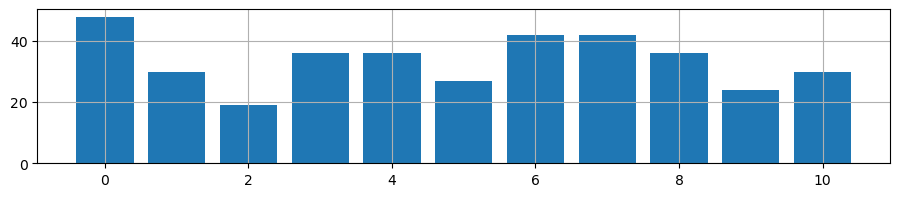

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,2))
plt.bar(range(n),weights), plt.grid(True), plt.savefig('fig1.png',dpi=300)
plt.show()

As can be seen, the items are various in weights. For a standard bin packing problem, we are going to pack each item to the bins. Note that the weights of the items cannot be split. For example, if the weight of item '2' is 19, we cannot split it into a '10' and a'9', which means that the item should be placed in the bin in one complete piece.

The first-fit algorithm takes the items and their weights as the input. We have put all the items in a list called 'weights'. Now, we have to set the constraints to make the algorithm functional.

#### Create bins and bin capacity

In [88]:
bins = [[0]]
B = 100

We create bins to contain items. Initially, the bin should be empty because no item is inside. B is the maximum capacity of each bin. In this case, we set the bin capacity equals to 100.

#### Algorithm Design

In [89]:
weights= np.array(weights)
for i in range(1,n):
        binned = False
        for j in range(len(bins)):
            if weights[i] <= (B - sum(weights[bins[j]])):
                bins[j].append(i)
                binned = True
                break
        if not binned:
            bins.append([i])

Convert the item list to an array first, then we will pack the items in the bins. Recall the first-fit algorithm, we create a for-loop takes each item in the weights array where n is the length of the array. In the for-loop, if the bin is packed and equals to false, then we do not have space to pack items; If it is not equals to false, then we pack items to the bin. In such case, if the weight of item i is less than the current capacity of that bin j, we pack the item i into the bin j and makes the bin equals to true, which means the bin j can still pack items. Otherwise, if the bin j fulls, it returns false. Also, we have to add new bins if the status turn to not binned.

#### Output

In [90]:
bins

[[0, 1, 2], [3, 4, 5], [6, 7], [8, 9, 10]]

The output shows the number of bins should be 4 in minimum if we would like to pack all 11 items. For example, for the first bin, we can see that the first three items are packed in that bin. The total weight for the three items equals to 97, which is less than the maximum capacity of the bin.

#### Convert piecewise codes into a function

In [91]:
def bin_ff(s,B):
    s = np.array(s)
    n = len(s)
    bins = [[0]]
    for i in range(1,n):
        binned = False
        for j in range(len(bins)):
            if s[i] <= (B - sum(s[bins[j]])):
                bins[j].append(i)
                binned = True
                break
        if not binned:
            bins.append([i])
    return bins

We import the function from lecture for checking purposes. The function takes an array and the fixed maximum capacity of bin to return the partition of the items into bins without exceeding the maximum bin-capacity. We want this function used for the method comparsions on other datasets in the next section.

## Case Study from Google OR-tools
We can apply bin packing problem to real-life scenarios or datasets with the help of google OR-tools. It provides codes for a basic bin problem if we look at ortools.linear_solver, pywraplp (https://developers.google.com/optimization/bin/bin_packing). The code is from the website and we are going to interpret the codes and see if the code can be applied to other datasets.

In this section, the first experiment data is the same as the first-fit greedy algorithm. We will compare the results from two methods and see if they output the same.

### Create Data Model

In [92]:
weights = [48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30]
data = {}
data['weights'] = weights
data['items'] = list(range(len(weights)))
data['bins'] = data['items']
data['bin_capacity'] = 100
data

{'weights': [48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30],
 'items': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'bins': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'bin_capacity': 100}

Firstly, we define a dataset for bin packing. It contains data information related the weights of a list of items, a list of bins, and the capacity of bin. Notice that the capacity for all bins in this problem are the same and we are not sure that how many bins do we need to contain all the items. The data here helps us to initiate the problem. For this particular problem, the maximum capacity of bins is 100. There are ten items with weights lower than the maximum capacity of bins. We cannot let the weight of one item larger than the maximum capacity of bins because we won't able to place the item in the bin.

### Import Solver

In [93]:
from ortools.linear_solver import pywraplp
solver = pywraplp.Solver.CreateSolver('SCIP')

We import pywraplp from ortools.linear_solver. It is a solver for mixed integer programming problems. We use 'SCIP' for this particular bin packing problem. The solver helps to slove a mixed interger programming problem and we are going to define the variables, constraints and objective function before using it.

### Define decision Variables

In [94]:
# x[i, j] = 1 if item i is packed in bin j.
x = {}

for i in data['items']:
    for j in data['bins']:
        x[(i, j)] = solver.IntVar(0, 1, 'x_%i_%i' % (i, j))

The decision variable x is in a double for-loop. The for-loop takes the item data and generate another for-loop which takes the bin data and results an array of variables. The value i will be the ith element in the item list and j will be the jth element in the bin list. The %i is used to perform concatenation of the elements in the loop, and the loop produces either 1 or 0. If it produces 1, then we can know item i is placed in bin j, and 0 otherwise.

In [95]:
# y[j] = 1 if bin j is used.
y = {}
for j in data['bins']:
    y[j] = solver.IntVar(0, 1, 'y[%i]' % j)

We also need to define if the bin is used by making another function named y which takes the bin data and it produces either 1 or 0. If it produces 1, we can tell the bin is being used and item/items is/are in the bin, and 0 otherwise.

### Define Constraints

In [96]:
for i in data['items']:
    solver.Add(sum(x[i, j] for j in data['bins']) == 1)


Constraints are also defined in form of loops. We need to make sure that each item is placed exactly in one bin. Thus we set the sum of decision variable x(takes item i and bin j) in bin j equals to 1 if the item i is placed into the bin j as our first constraint. 

In [97]:
for j in data['bins']:
    solver.Add(
        sum(x[(i, j)] * data['weights'][i] for i in data['items']) <= y[j] *
        data['bin_capacity'])

Another constraint is the item weights in one bin do not exceed the bin capacity. We takes the bin data, and add the bin if the total weights of items in the bin is less or equals to the maximum capacity of the bin. Notice that we use an inequality sign to denote this situation and the weights of total items should be less or equal to the maximum bin capacity.

### Define Objective Function

In [98]:
solver.Minimize(solver.Sum([y[j] for j in data['bins']]))

Then we create an objective function using solver.Minimize. The objective is to minimize the total number of bins we used for packing all the items in this problem.

### Setting Up the Solver and Showing Results

In [99]:
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    num_bins = 0.
        # in this for loop, if the y[j] value equals to 1, then it is considered used, then we can add
        # items to the bin and the total number of bins will increase by 1.
    for j in data['bins']:
        if y[j].solution_value() == 1:
            bin_items = []
            bin_weight = 0
            for i in data['items']:
                if x[i, j].solution_value() > 0:
                    bin_items.append(i)
                    bin_weight += data['weights'][i]
            if bin_weight > 0:
                num_bins += 1
                print('Bin number', j)
                print('  Items packed:', bin_items)
                print('  Total weight:', bin_weight)
                print()
    print()
    print('Number of bins used:', num_bins)
else:
    print('The problem does not have an optimal solution.')

Bin number 0
  Items packed: [0, 1, 2]
  Total weight: 97

Bin number 1
  Items packed: [3, 4, 5]
  Total weight: 99

Bin number 2
  Items packed: [6, 7]
  Total weight: 84

Bin number 3
  Items packed: [8, 9, 10]
  Total weight: 90


Number of bins used: 4.0


#### Code Intepretation
Then we solve this bin packing problem with the help of pywraplp solver. We set a status to solve the problem. Initally, if status equals to the optimal bin packing arrangement before we adding any items, then the default number of bin used equals to 0. Now we start to add bins. If the bin is used(y[j]=1), then we display the items in the bin and the bin weight as output. To generate values for this output, we write a for loop which takes the items and aim to add items to the bin with the item weights. If the weight of the item i in bin j is positive, then we add the item i to the bin j. The number of total bin required will be add one if the bin is used. In the end, the output will print all the details bins and the number of bins we used for this problem.

#### Output Intepretation and Comparsion with First-fit Greedy Algorithm
For this particular problem, the solution shows the items packed in ecah bin, the total bin weight and the time taken for this bin packing problem. The above solution indicates that four bins are required to pack all the items and weights of bins are 97,99,84,90 respectively. When we have ten items with weights like this, we only need to use four bins to pack these items as an optimal solution.

The data produced the same outputs as First-fit Greedy Algorithm. Although the constraints settings and decision variables settings are slightly different in codes, but the general idea is similar.

## Experimenting the Code from Google OR-tools for Random Bin Packing Datasets

Now we consider a different dataset with more items and bins and import data from the website:
https://www2.wiwi.uni-jena.de/Entscheidung/binpp/index.htm

I chose a random data set from the above link and set different capacities of bins to test if the function can be applied to various dataset.

### Import the .csv File to Python

In [9]:
import csv
import pandas as pd
import numpy as np 

df = pd.read_csv('binpacking.csv', header = None)
a = df.to_numpy()
a = a.flatten()
a = a.tolist()

df is the dataset we would like to import and we use the code read_csv from pandas. Then we make the data set to a list to initiate the bin packing problem.

### Problem Solving based on the code from Google OR-tools

In [10]:
data = {}
weights = a
data['weights'] = weights
data['items'] = list(range(len(weights)))
data['bins'] = data['items']
data['bin_capacity'] = 800

# The main is defined to have variables, constraints and an objective function.
def main(data):
    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Variables
    x = {}
    for i in data['items']:
        for j in data['bins']:
            x[(i, j)] = solver.IntVar(0, 1, 'x_%i_%i' % (i, j))
    y = {}
    for j in data['bins']:
        y[j] = solver.IntVar(0, 1, 'y[%i]' % j)

    # Constraints
    for i in data['items']:
        solver.Add(sum(x[i, j] for j in data['bins']) == 1)
    for j in data['bins']:
        solver.Add(
            sum(x[(i, j)] * data['weights'][i] for i in data['items']) <= y[j] *
            data['bin_capacity'])

    # Objective: minimize the number of bins used.
    solver.Minimize(solver.Sum([y[j] for j in data['bins']]))

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        num_bins = 0.
        for j in data['bins']:
            if y[j].solution_value() == 1:
                bin_items = []
                bin_weight = 0
                for i in data['items']:
                    if x[i, j].solution_value() > 0:
                        bin_items.append(i)
                        bin_weight += data['weights'][i]
                if bin_weight > 0:
                    num_bins += 1
                    bin_number = print('Bin number', j)
                    item_packed = print('  Items packed:', bin_items)
                    total_weight = print('  Total weight:', bin_weight)
        print('Number of bins used:', num_bins)
        print('Time = ', solver.WallTime(), ' milliseconds')
    else:
        print('The problem does not have an optimal solution.')
main(data)

Bin number 0
  Items packed: [0, 1, 2, 3, 4, 5, 6, 7, 22]
  Total weight: 800
Bin number 1
  Items packed: [8, 9, 10, 11, 12, 13, 14, 15, 16, 37]
  Total weight: 799
Bin number 2
  Items packed: [17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 44]
  Total weight: 800
Bin number 3
  Items packed: [30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51]
  Total weight: 533
Number of bins used: 4.0
Time =  267  milliseconds


We just applied the code from the first section and it worked. For bin capacity equals to 800, the total bin used equals to 8 and the time taken is around 200 milliseconds.

### Experiments on Large Random Arrays

I try to build an random integer array that takes 500 items and the weight per item is between 1 to 30. To visualize the data easilier, I make the capacity of bin very large and see if the code works.

In [71]:
weights = np.random.randint(1,30,500,dtype=int)
data['items'] = list(range(len(weights)))
data['weights'] = weights
data['bin_capacity'] = 2000

In [72]:
sol=main(data)

Bin number 0
  Items packed: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 147, 148]
  Total weight: 2000
Bin number 1
  Items packed: [145, 146, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,

The result shows four bins are required to carry all the items. It proves that the code works for relatively large data sets, but the time for computation is much longer than small-sacle data sets. The reason could be due to the existence of for-loop. As all the items will go to the loop to evaluate if it can be placed to the bin.

### Comparsion with First-Fit Greedy Algorithm on Random Samples

Recall the last section, we have a function for first-fit algorithm. We apply it to random datasets  and check if the two methods output the same results.

#### Output Comparsion for the .csv File

In [81]:
print(bin_ff(a,800))

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51]]


The number of bins used and the items of bins are exactly the same and it proves that the or-tools is correct for this problem.

#### Output Comparsion for an Example which the Weights of Items Exceeds the Capacity of Bins

We will test if the two functions pass if we set the bin capacity below the weights of items. Ideally, if the capacity of bin is less than the weight of item, we cannot pack the item into the bin.

##### Google or-tools Result

In [83]:
weights =[48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30]
data['bin_capacity'] = 20
sol=main(data)

The problem does not have an optimal solution.


If we set the bin capacity lower than the maximum weight of item, google or-tools shows no result and thus satisfies with the constraints we set in the previous codes. 

##### First-Fit Greedy Function Result

In [85]:
print(bin_ff(weights,20))

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]


Here comes for a problem for the first-fit greedy function we built in the lecture. Since we do not add the constraints for the bin capacity larger or equal to the highest weights of items, we thus get the result of each individual item is packed in a bin. However, we cannot actually pack the items because our bin is too small to pack them.

For function improvement, we can add the constraints to the function just like what the goole or-tools did, but it takes more time to run the function especially for large datasets.

## Conclusion
In general, both first-fit greedy algorithm and or-tools function can be applied to many other bin packing dataset and for computational efficiency. Since multiple for-loops are existed in the solver, for very large-scale data sets, the program will taker longer time to get an optimal solution, but it is still very good choice for small scale data sets. While the first-fit greedy algorithm has a fast calculation time and accurate results if the capacity of bins is setted previously, but for an unknown weight dataset, we should improve the function to make sure that individual item weight does not exceed the maximum capacity of bins.

## Reference

Google. (n.d.). The bin packing problem &nbsp;|&nbsp; or-tools &nbsp;|&nbsp; google developers. Google. Retrieved December 9, 2022, from https://developers.google.com/optimization/bin/bin_packing 

Wikimedia Foundation. (2022, November 16). Bin Packing problem. Wikipedia. Retrieved December 9, 2022, from https://en.wikipedia.org/wiki/Bin_packing_problem 